In [1]:
#Plotting Graphs
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf

from sklearn import datasets


from tensorflow.python.framework import ops
ops.reset_default_graph()

#show graph in ipython notebook
%matplotlib inline

In [3]:
iris = datasets.load_iris()

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [21]:
len(iris.target)

150

In [8]:
x_vals = np.array([x[3] for x in iris.data])

In [9]:
y_vals = np.array([x[0] for x in iris.data])

In [10]:
x_vals

array([ 0.2,  0.2,  0.2,  0.2,  0.2,  0.4,  0.3,  0.2,  0.2,  0.1,  0.2,
        0.2,  0.1,  0.1,  0.2,  0.4,  0.4,  0.3,  0.3,  0.3,  0.2,  0.4,
        0.2,  0.5,  0.2,  0.2,  0.4,  0.2,  0.2,  0.2,  0.2,  0.4,  0.1,
        0.2,  0.1,  0.2,  0.2,  0.1,  0.2,  0.2,  0.3,  0.3,  0.2,  0.6,
        0.4,  0.3,  0.2,  0.2,  0.2,  0.2,  1.4,  1.5,  1.5,  1.3,  1.5,
        1.3,  1.6,  1. ,  1.3,  1.4,  1. ,  1.5,  1. ,  1.4,  1.3,  1.4,
        1.5,  1. ,  1.5,  1.1,  1.8,  1.3,  1.5,  1.2,  1.3,  1.4,  1.4,
        1.7,  1.5,  1. ,  1.1,  1. ,  1.2,  1.6,  1.5,  1.6,  1.5,  1.3,
        1.3,  1.3,  1.2,  1.4,  1.2,  1. ,  1.3,  1.2,  1.3,  1.3,  1.1,
        1.3,  2.5,  1.9,  2.1,  1.8,  2.2,  2.1,  1.7,  1.8,  1.8,  2.5,
        2. ,  1.9,  2.1,  2. ,  2.4,  2.3,  1.8,  2.2,  2.3,  1.5,  2.3,
        2. ,  2. ,  1.8,  2.1,  1.8,  1.8,  1.8,  2.1,  1.6,  1.9,  2. ,
        2.2,  1.5,  1.4,  2.3,  2.4,  1.8,  1.8,  2.1,  2.4,  2.3,  1.9,
        2.3,  2.5,  2.3,  1.9,  2. ,  2.3,  1.8])

In [11]:
y_vals

array([ 5.1,  4.9,  4.7,  4.6,  5. ,  5.4,  4.6,  5. ,  4.4,  4.9,  5.4,
        4.8,  4.8,  4.3,  5.8,  5.7,  5.4,  5.1,  5.7,  5.1,  5.4,  5.1,
        4.6,  5.1,  4.8,  5. ,  5. ,  5.2,  5.2,  4.7,  4.8,  5.4,  5.2,
        5.5,  4.9,  5. ,  5.5,  4.9,  4.4,  5.1,  5. ,  4.5,  4.4,  5. ,
        5.1,  4.8,  5.1,  4.6,  5.3,  5. ,  7. ,  6.4,  6.9,  5.5,  6.5,
        5.7,  6.3,  4.9,  6.6,  5.2,  5. ,  5.9,  6. ,  6.1,  5.6,  6.7,
        5.6,  5.8,  6.2,  5.6,  5.9,  6.1,  6.3,  6.1,  6.4,  6.6,  6.8,
        6.7,  6. ,  5.7,  5.5,  5.5,  5.8,  6. ,  5.4,  6. ,  6.7,  6.3,
        5.6,  5.5,  5.5,  6.1,  5.8,  5. ,  5.6,  5.7,  5.7,  6.2,  5.1,
        5.7,  6.3,  5.8,  7.1,  6.3,  6.5,  7.6,  4.9,  7.3,  6.7,  7.2,
        6.5,  6.4,  6.8,  5.7,  5.8,  6.4,  6.5,  7.7,  7.7,  6. ,  6.9,
        5.6,  7.7,  6.3,  6.7,  7.2,  6.2,  6.1,  6.4,  7.2,  7.4,  7.9,
        6.4,  6.3,  6.1,  7.7,  6.3,  6.4,  6. ,  6.9,  6.7,  6.9,  5.8,
        6.8,  6.7,  6.7,  6.3,  6.5,  6.2,  5.9])

In [12]:
# Initialize placeholders
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [13]:
# Create variables for linear regression, y = Ax + b
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [14]:
# Declare model operations
model_output = tf.add(tf.matmul(x_data, A), b)

In [15]:
# Declare loss function (L2 loss)
loss = tf.reduce_mean(tf.square(y_target - model_output))

In [18]:
# Initialize variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [20]:
#Using GD find the case which has min loss 
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(loss)

Step #25 A = [[ 1.0110389]] b = [[ 4.52075243]]
Loss = 0.278333
Step #50 A = [[ 0.97072154]] b = [[ 4.65077209]]
Loss = 0.109885
Step #75 A = [[ 0.95730346]] b = [[ 4.68907738]]
Loss = 0.139451
Step #100 A = [[ 0.93071383]] b = [[ 4.72984409]]
Loss = 0.208288


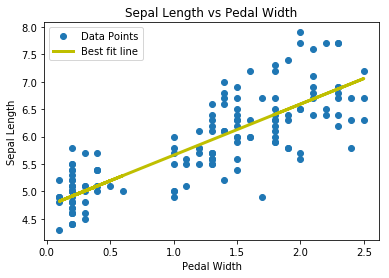

In [24]:
loss_vec = []
batch_size = 25
for i in range(100):
    #getting 25 random index out of 150 data
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    #feed_dict to pass variables
    sess.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    temp_loss = sess.run(loss,feed_dict={x_data:rand_x, y_target:rand_y})
    loss_vec.append(temp_loss)
    if (i+1)%25 ==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss)) 
        
# Get the optimal coefficients
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

# Get best fit line
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)

# Plot the result
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'y-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

    